훈련세트, 테스트 세트 크기 확인 :  (25000,) (25000,)
첫번째 리뷰의 길이 출력 :  189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]
239.00925 178.0
lengths :  [259 520 290 ... 300 

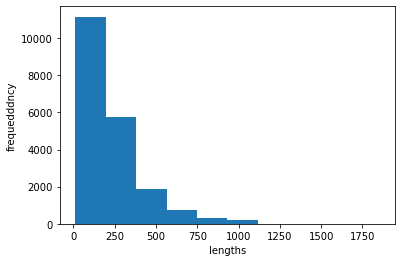

토큰 100으로 자른 train_seq의 형태 :  (20000, 100)
원핫인코딩 된 train_seq, 즉 train_oh의 형태 :  (20000, 100, 500)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8)                 4072      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
print("훈련세트, 테스트 세트 크기 확인 : ", train_input.shape, test_input.shape)  
#(25000, ) (25000, )  => 2차원을 1차원으로 하는 것보다 1차원으로 해서 메모리 효율 높이기
print("첫번째 리뷰의 길이 출력 : ", len(train_input[1]))  #첫번째 리뷰의 길이 출력 :  189

'''
#1~10번째까지의 리뷰의 길이
for i in range(10):
    print(len(train_input[i]))
'''

#첫번째 리뷰의 내용 출력
print(train_input[0])  #이미 데이터는 정수화 되어있다. 어휘사전에는 500개의 단어가 있고 사전에 없으면 2로 표시

#타깃데이터 출력
print(train_target[:20])  #0 or 1. 긍정이냐 부정이냐?

#검증세트20프로로 분리
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

#리뷰 길이 계산를 계산해 넘파이 배열로.
#리뷰 길이를 알아야 어느 정도 토큰(단어)를 사용할 지 정할수 있기 때문
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))      #239.00925 178.0
print("lengths : ", lengths)


#히스토그램으로 리뷰 길이(lengths 배열) 표현
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequedddncy')
plt.show()


##100개의 단어보다 작은 리뷰들이 많으므로 토큰의 길이를 100으로 맞춘다. 보통 패딩을 나타내는 토큰으로는 0사용
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)  #=>maxlen을 사용하면 이보다 긴 경우는 자르고 짧으면 0으로 패딩

print("토큰 100으로 자른 train_seq의 형태 : ", train_seq.shape)  #(20000, 100)

#기본적으로 100자를 기준으로 하는 경우, 기준이 100이 넘어가면 뒤를 자르나 중요정보가 뒤에 많으므로 뒤를 살려준다. => pad_sequences() 사용
val_seq = pad_sequences(val_input, maxlen=100)

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

#train_seq => 원핫인코딩
train_oh = keras.utils.to_categorical(train_seq)
print("원핫인코딩 된 train_seq, 즉 train_oh의 형태 : ", train_oh.shape)  # (20000, 100, 500)

#토큰 100으로 자른 train_seq의 형태 :  (20000, 100)
#원핫인코딩 된 train_seq, 즉 train_oh의 형태 :  (20000, 100, 500)
#즉, 정수 하나마다 모두 500차원의 배열로 변경했기 때문에 (20000, 100) => (20000, 100, 500)으로 변경

#val_seq => 원핫인코딩
val_oh = keras.utils.to_categorical(val_seq)

model.summary()

In [20]:
#순환신경망 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simple-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])



Epoch 1/100
313/313 [==============================] - 22s 61ms/step - loss: 0.6944 - accuracy: 0.5126 - val_loss: 0.6762 - val_accuracy: 0.5768
Epoch 2/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6335 - accuracy: 0.6502 - val_loss: 0.5661 - val_accuracy: 0.7200
Epoch 3/100
313/313 [==============================] - 19s 60ms/step - loss: 0.5401 - accuracy: 0.7393 - val_loss: 0.5620 - val_accuracy: 0.7194
Epoch 4/100
313/313 [==============================] - 18s 56ms/step - loss: 0.4870 - accuracy: 0.7752 - val_loss: 0.5427 - val_accuracy: 0.7346
Epoch 5/100
313/313 [==============================] - 16s 50ms/step - loss: 0.4652 - accuracy: 0.7894 - val_loss: 0.5163 - val_accuracy: 0.7512
Epoch 6/100
313/313 [==============================] - 16s 50ms/step - loss: 0.4494 - accuracy: 0.7986 - val_loss: 0.5150 - val_accuracy: 0.7516
Epoch 7/100
313/313 [==============================] - 18s 59ms/step - loss: 0.4307 - accuracy: 0.8120 - val_loss: 0.4655 - val_ac

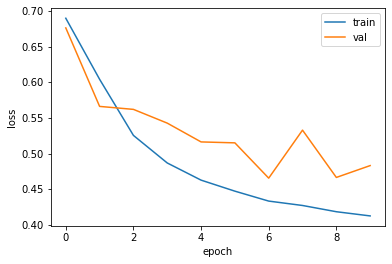

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [24]:
#원핫인코딩이 아닌, 단어 임베딩을 이용한 모델링
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
model2.summary()
#500은 어휘사전의 크기. 16은 임베딩 벡터의 크기. input_length는 입력 시퀀스의 길이. 

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.